<a href="https://colab.research.google.com/github/SahilBeniwal22/DL/blob/main/DL_Exp_8(cifar10_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


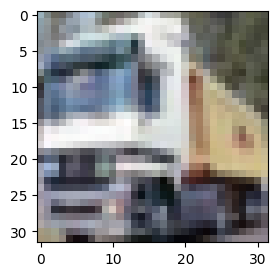

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(x_train[1])

In [12]:
y_train[0]

array([6], dtype=uint8)

In [13]:
x_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [15]:
x_test.shape , y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [18]:
x_train_normalize = x_train/255
x_test_normalize = x_test/255

In [19]:
x_train_normalize.shape , x_test_normalize.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
# Convert y_train and y_test to one-hot encoded format
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [20]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create the model
model = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'], run_eagerly=True)


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 805802 (3.07 MB)
Trainable params: 805802 (3.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [30]:
model.fit(x_train_normalize,y_train_one_hot,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4753 - accuracy: 0.4787
Epoch 2/3
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1737 - accuracy: 0.5908
Epoch 3/3
1563/1563 [==============================] - 104s 67ms/step - loss: 1.0318 - accuracy: 0.6421


In [32]:
loss , accuracy = model.evaluate (x_test_normalize , y_test_one_hot)
accuracy

313/313 [==============================] - 13s 42ms/step - loss: 1.1546 - accuracy: 0.6090


0.609000027179718

In [33]:
y_preds = model.predict(x_test_normalize)

313/313 [==============================] - 4s 13ms/step


In [34]:
from sklearn.metrics import classification_report

In [36]:
import numpy as np

predicted_classes = np.argmax(y_preds , axis =1 )

In [37]:
print(classification_report(y_test , predicted_classes))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68      1000
           1       0.74      0.75      0.75      1000
           2       0.46      0.56      0.51      1000
           3       0.45      0.35      0.40      1000
           4       0.64      0.45      0.53      1000
           5       0.39      0.70      0.50      1000
           6       0.62      0.77      0.69      1000
           7       0.70      0.64      0.67      1000
           8       0.83      0.68      0.75      1000
           9       0.78      0.57      0.66      1000

    accuracy                           0.61     10000
   macro avg       0.64      0.61      0.61     10000
weighted avg       0.64      0.61      0.61     10000

